<a href="https://colab.research.google.com/github/AdeoyeAdekeye/data-science-portfolio/blob/main/eda_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: What Drives Housing Prices in California?

This project explores the California Housing dataset to uncover what factors affect median house values. We'll perform exploratory data analysis (EDA) using Python libraries like Pandas, Matplotlib, and Seaborn.


In [7]:
# Load Required Libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io


In [8]:
#  Load Dataset
df_url = 'https://raw.githubusercontent.com/akmand/datasets/refs/heads/main/california_housing.csv'
url_content = requests.get(df_url, verify=False).content
df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [9]:
# Basic Info
print("Shape:", df.shape)
df.info()
df.describe()


Shape: (20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
# Check for Missing Values
df.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


##  Data Dictionary (Column Descriptions)

| Column                 | Description                                  |
|------------------------|----------------------------------------------|
| longitude              | Longitude of the block                       |
| latitude               | Latitude of the block                        |
| housing_median_age     | Median age of the houses in the block        |
| total_rooms            | Total number of rooms in the block           |
| total_bedrooms         | Total number of bedrooms in the block        |
| population             | Population of the block                      |
| households             | Number of households                         |
| median_income          | Median income in block (in tens of thousands)|
| median_house_value     | Median house price in USD                    |


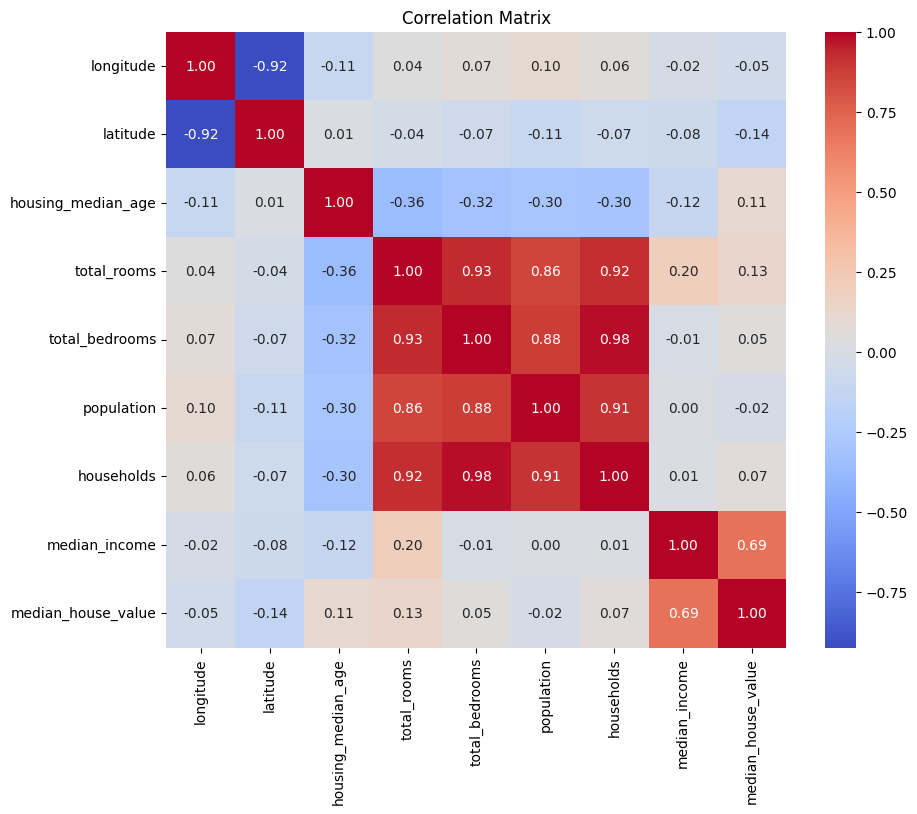

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Now generate the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


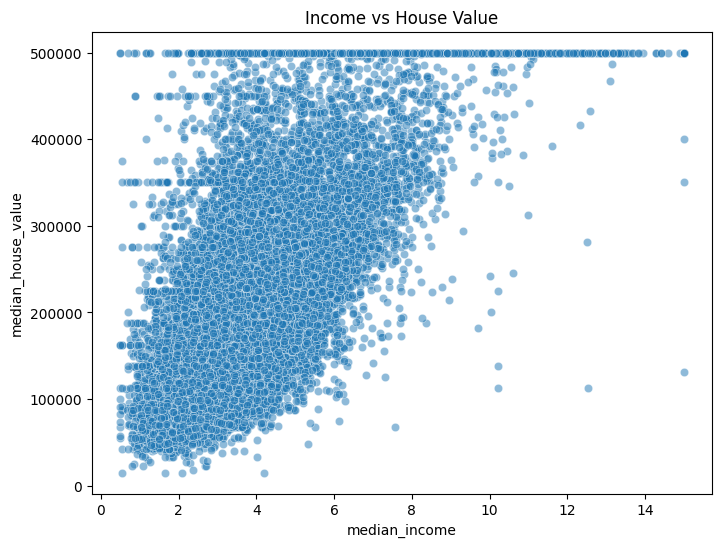

In [14]:
# Scatter Plot: Income vs House Value
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.5)
plt.title("Income vs House Value")
plt.show()


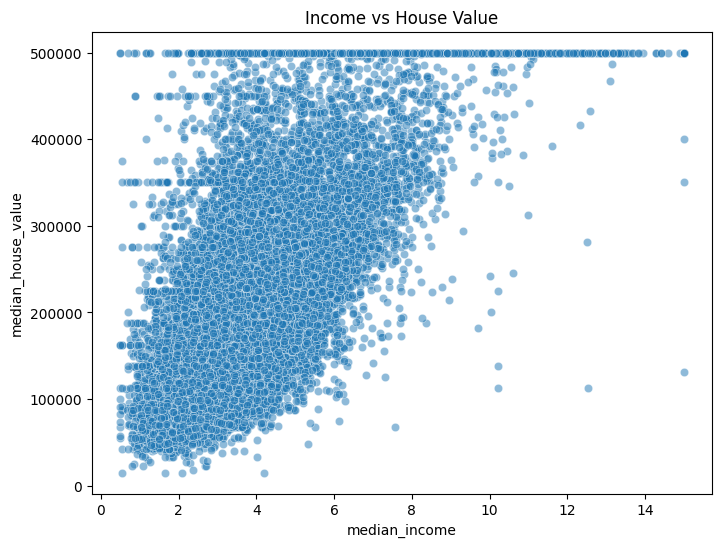

In [15]:
# Scatter Plot: Income vs House Value
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.5)
plt.title("Income vs House Value")
plt.show()


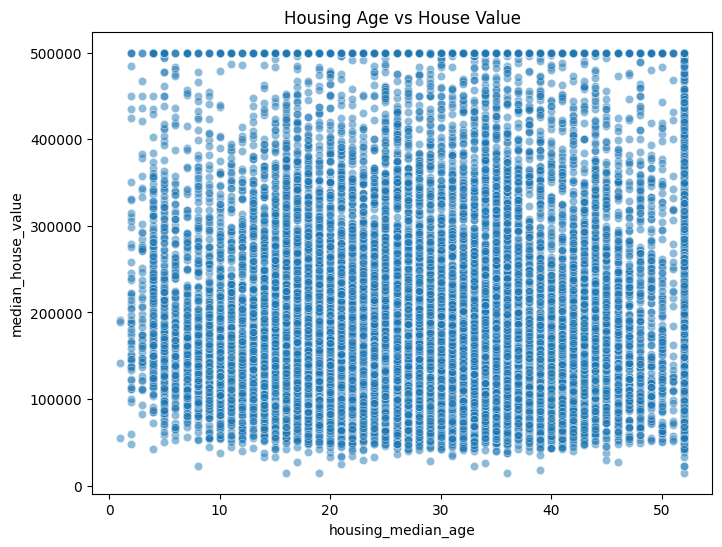

In [16]:
# Scatter Plot: Age vs House Value
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='housing_median_age', y='median_house_value', alpha=0.5)
plt.title("Housing Age vs House Value")
plt.show()


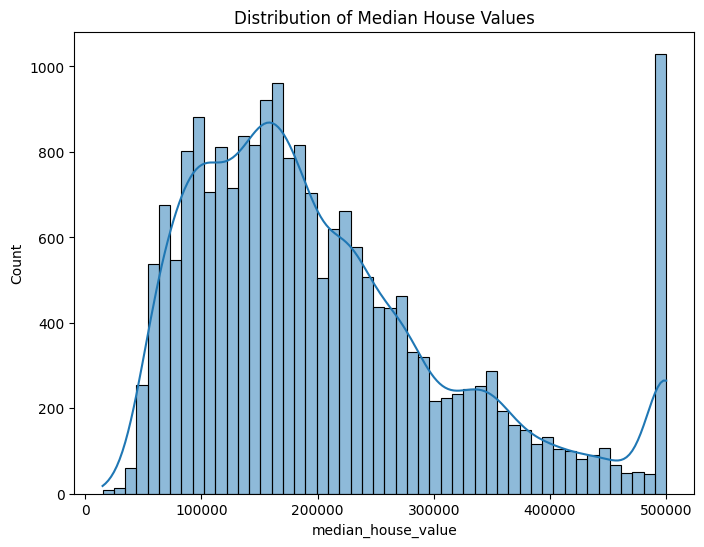

In [17]:
# Distribution of Median House Value
plt.figure(figsize=(8,6))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title("Distribution of Median House Values")
plt.show()


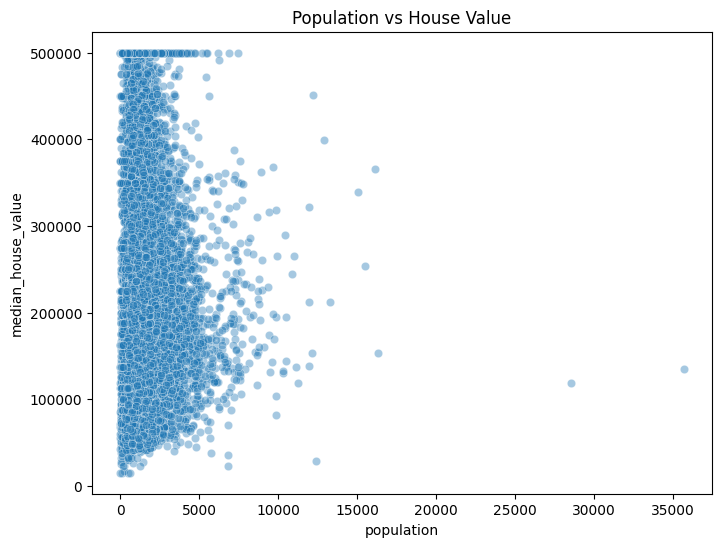

In [18]:
#  Population vs Median House Value
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='population', y='median_house_value', alpha=0.4)
plt.title("Population vs House Value")
plt.show()


##  Key Insights

- **Median Income** has a strong positive correlation with house prices.
- **Housing Age** and **Population** have weak or unclear relationships.
- Some neighborhoods have extremely high house values — possible outliers.
- We could explore further using machine learning to predict house values.


## Conclusion

This EDA revealed important variables affecting house prices in California. In future iterations, we could:
- Remove outliers
- Normalize features
- Build regression models for price prediction
